<a href="https://colab.research.google.com/github/Felipedeor/AD4-Audiovisual/blob/main/AD4_Audiovisual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.colab import auth

In [ ]:
#Realizando a autenticação e definindo o projeto
auth.authenticate_user()
print("Autenticado com sucesso.")
project_id = 'ad4-audiovisual'
client = bigquery.Client(project=project_id)

Autenticado com sucesso.


In [ ]:
#Realizando a consulta no BigQuery
query_extracao = client.query('''SELECT snapshot_date, name, artists, daily_rank, daily_movement, weekly_movement, popularity, is_explicit, duration_ms, album_release_date, energy FROM `ad4-audiovisual.spotify.bruto` WHERE country = 'BR';''')

In [ ]:
#Transformando a consulta em um dataframe do Pandas
df = query_extracao.to_dataframe()

In [ ]:
#Convertendo o campo de data para o formato adequado
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

#Filtrando pelo mês de janeiro de 2024
df = df[(df['snapshot_date'] >= '2024-01-01') & (df['snapshot_date'] <= '2024-01-31')]

In [ ]:
#Renomeando as colunas
novos_nomes = {'snapshot_date':'data','name':'nome','artists':'artistas','daily_rank':'ranking_diario','daily_movement':'movimento_diario','weekly_movement':'movimento_semanal','popularity':'popularidade','is_explicit':'explicito','duration_ms':'duracao','album_release_date':'lancamento','energy':'energia'}
df.rename(columns=novos_nomes, inplace=True)

#convertendo o campo de lançamento para o formato correto
df['lancamento'] = pd.to_datetime(df['lancamento'])

#Convertendo a coluna duracao de milissegundos para segundos
df['duracao'] = df['duracao']/1000

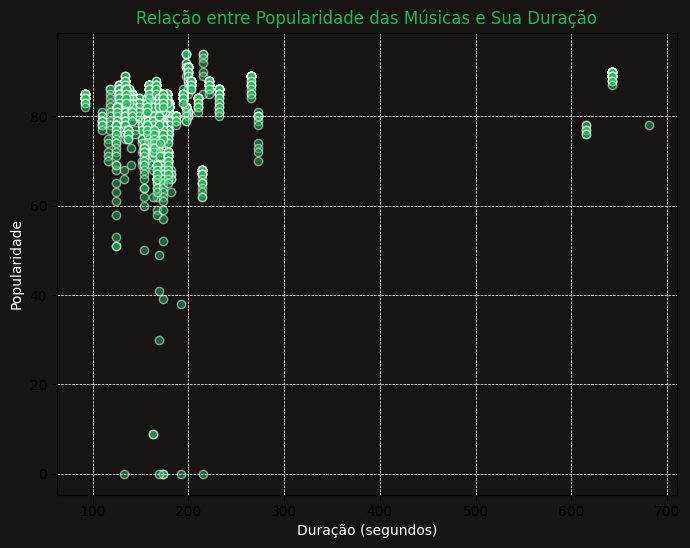

Em uma análise superficial, podemos observar que não há correlação entre a duração da faixa e a sua popularidade.


In [ ]:
# Definindo as cores
cor_fundo = '#191414'
cor_texto = '#FFFFFF'
cor_titulo = '#1DB954'

# Gerando um gráfico de dispersão para visualizar as faixas populares comparadas com a duração
plt.figure(figsize=(8, 6))
plt.scatter(df['duracao'], df['popularidade'], alpha=0.5, color='#1DB954', edgecolors='white')  # Definindo a cor dos pontos e das bordas
plt.title('Relação entre Popularidade das Músicas e Sua Duração', color=cor_titulo)  # Definindo a cor do título
plt.xlabel('Duração (segundos)', color=cor_texto)  # Definindo a cor do texto do eixo x
plt.ylabel('Popularidade', color=cor_texto)  # Definindo a cor do texto do eixo y
plt.grid(True, color='white', linestyle='--', linewidth=0.5)  # Definindo a cor e o estilo das linhas de grade
plt.gca().set_facecolor(cor_fundo)  # Definindo a cor de fundo do gráfico
plt.gcf().patch.set_facecolor(cor_fundo)  # Definindo a cor de fundo da figura

plt.show()
print('Em uma análise superficial, podemos observar que não há correlação entre a duração da faixa e a sua popularidade.')

In [ ]:
#Separando os artistas e verificando os mais populares
artistas = df['artistas'].str.split(',')
artistas = artistas.explode('artistas')
artistas = artistas.str.strip()
contagem = artistas.value_counts().head(10)

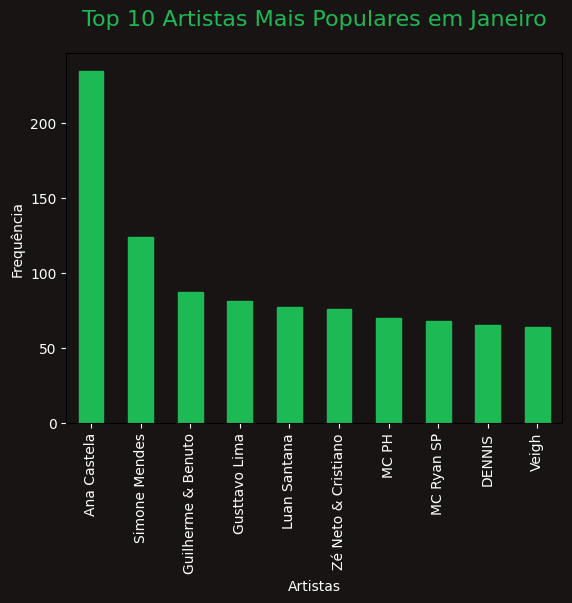

In [ ]:
#Montando o gráfico para exibir os artistas mais populares
fig, ax = plt.subplots()
contagem.plot(kind='bar', color=cor_titulo, edgecolor=cor_titulo, ax=ax)
plt.title('Top 10 Artistas Mais Populares em Janeiro', color=cor_titulo, backgroundcolor=cor_fundo, loc='center', pad=20, fontsize=16)
ax.set_facecolor(cor_fundo)
ax.set_xlabel('Artistas', color=cor_texto)
ax.set_ylabel('Frequência', color=cor_texto)
ax.tick_params(axis='x', colors=cor_texto)
ax.tick_params(axis='y', colors=cor_texto)
fig.patch.set_facecolor(cor_fundo)
fig.patch.set_edgecolor(cor_fundo)
plt.show()

In [ ]:
df.to_excel('spotify.xlsx', index=False)